# Feature selection

In [2]:
from warnings import filterwarnings

filterwarnings("ignore")

In [3]:
import pandas as pd

df = pd.read_csv("training_Set.csv", na_values=["", "NA"], keep_default_na=False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Target Sales price 

# Step 2 - Perform basic data quality checks

In [4]:
df.shape

(1460, 81)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(1460, 81)

In [7]:
m = df.isna().sum()
m[m > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Cardinality is checked only on categorical features
df.select_dtypes(include="object").nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [9]:
def get_high_card(df, threshold=0.9):
    cat_unique = df.select_dtypes(include="object").nunique()
    rows = len(df)
    cardinality = cat_unique / rows
    high_card = cardinality[cardinality >= threshold]
    print(high_card)
    return high_card.index.tolist()

In [10]:
high_card = get_high_card(df, threshold=0.9)
print(high_card)

Series([], dtype: float64)
[]


In [11]:
df = df.drop(columns=high_card)
df.shape

(1460, 81)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
X = df.drop(columns=["Id", "SalePrice"])
Y = df["SalePrice"]

In [14]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [15]:
Y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

 # Step 4 - Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=21)

In [17]:
xtrain.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
710,30,RL,56.0,4130,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1098,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
1286,20,RL,NaN,9790,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
992,60,RL,80.0,9760,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnWw,NaN,0,7,2007,WD,Normal
631,120,RL,34.0,4590,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal


In [18]:
ytrain.head()

710      52000
1098    128000
1286    143000
992     187000
631     209500
Name: SalePrice, dtype: int64

In [19]:
xtest.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
880,20,RL,60.0,7024,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
605,60,RL,85.0,13600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,189,0,NaN,NaN,NaN,0,10,2009,WD,Normal
1166,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
216,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
970,50,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml


In [20]:
ytest.head()

880     157000
605     205000
1166    245350
216     210000
970     135000
Name: SalePrice, dtype: int64

# Step 5 - Apply Preprocessing on xtrain, xtest

In [21]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [22]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [24]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [25]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    StandardScaler(),
)

In [26]:
pre = ColumnTransformer(
    [("num", num_pipe, num_cols), 
     ("cat", cat_pipe, cat_cols)],remainder="drop"
).set_output(transform="pandas")

In [27]:
pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [28]:
xtrain_pre = pre.transform(xtrain)
xtrain_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
710,-0.639505,-0.640097,-0.610390,-2.264159,0.371687,-1.182858,0.877919,-0.580525,-0.968830,-0.274742,...,-0.688303,0.95057,0.208601,0.189389,-3.520289,0.048825,0.244155,0.044155,0.308409,0.200871
1098,-0.166757,-0.906459,-0.437322,-1.536438,0.371687,-1.150075,-1.703259,-0.580525,0.496747,-0.274742,...,1.589141,0.95057,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
1286,-0.875879,-0.018586,-0.086559,-0.080996,-0.521585,-0.264931,-1.070140,1.882760,0.272112,0.229492,...,-0.688303,0.95057,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
992,0.069617,0.425350,-0.089336,-0.080996,2.158232,-0.232148,0.390904,1.276497,0.200142,0.453597,...,-0.688303,-0.27760,0.208601,0.189389,0.306326,0.048825,2.543938,0.044155,0.308409,0.200871
631,1.487861,-1.616757,-0.567817,1.374445,-0.521585,1.144742,1.024023,0.009352,-0.916488,-0.274742,...,-0.688303,-0.27760,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871


In [29]:

xtest_pre = pre.transform(xtest)
xtest_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
880,-0.875879,-0.462522,-0.342552,-0.808717,-0.521585,1.111959,1.024023,-0.580525,1.168470,-0.274742,...,-0.688303,-1.505771,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
605,0.069617,0.647318,0.266055,0.646725,0.371687,-0.199365,0.244800,0.380757,0.021307,-0.274742,...,-0.688303,0.950570,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
1166,-0.875879,-0.284948,-0.023163,1.374445,-0.521585,1.210308,1.121426,-0.187273,-0.968830,-0.274742,...,-0.688303,-0.277600,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
216,-0.875879,-0.240554,-0.210576,0.646725,-0.521585,1.079176,0.926620,0.872322,1.094318,-0.274742,...,-0.688303,0.950570,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
970,-0.166757,-0.462522,0.006916,-1.536438,-1.414858,-0.723895,-1.703259,-0.580525,-0.968830,-0.274742,...,-0.688303,0.950570,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,-3.508497


# Step 6 : Without feature slection model performance

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
score1 = cross_val_score(model1, xtrain_pre, ytrain, cv=5,scoring="r2")
score1

array([0.45776825, 0.76869615, 0.87768136, 0.83247963, 0.8379433 ])

In [31]:
score1.mean()

np.float64(0.7549137372810077)

In [32]:
score1.std()

np.float64(0.15262218701428132)

In [33]:
model1.fit(xtrain_pre, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
model1.coef_

array([ -4234.19547027,  -4407.43428242,   4884.73341086,  13573.52901554,
         5910.51620103,   6754.9771549 ,    229.69980385,   7048.44041206,
         2156.56229842,   1088.16771344,  -1698.5013599 ,    951.04562383,
        10648.29841876,   8994.11027262,  -1293.6740205 ,  15191.05653263,
         3814.87930081,  -1477.98375676,    862.06608963,   -866.75937464,
        -3089.77687469,  -3602.34385035,   5817.7145369 ,   1654.13725966,
          603.94490034,   8698.41798156,  -2629.17378393,   2567.4056948 ,
          813.17284987,   -636.34469207,   1180.31552576,   3013.86829124,
        -7228.14231174,  -2124.17826999,    471.93585824,  -1084.51920727,
         -641.94916897,   2620.3599612 ,   -538.3399919 ,  -1424.83344029,
         1485.32219047,  -1390.14117759,    635.25251899,   1726.84154495,
         1417.72913285,   -932.63765494,   -263.42547965,  -3625.19966857,
        -1022.71256917,   2835.27862448,   2375.89101669,  -3718.35544343,
         2411.11155676,  

In [35]:
model1.intercept_

np.float64(181136.7020547945)

In [36]:
train_r2 = model1.score(xtrain_pre, ytrain)
print(f"R2 score on train : {train_r2:.2%}")

R2 score on train : 86.80%


In [37]:

test_r2 = model1.score(xtest_pre, ytest)
test_r2
print(f"R2 score in test : {test_r2:.2%}")

R2 score in test : 79.98%


In [38]:
gen_error = abs(train_r2 - test_r2)
print(f"Generalization Error : {gen_error:.4f}")

Generalization Error : 0.0682


In [39]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="r2")
    cv_mean = scores.mean().round(4)
    cv_std = scores.std().round(4)
    model.fit(xtrain, ytrain)
    train_r2 = round(model.score(xtrain, ytrain), 4)
    test_r2 = round(model.score(xtest, ytest), 4)
    gen_err = round(abs(train_r2 - test_r2), 4)
    return {
        "model_name": type(model).__name__,
        "model": model,
        "cv_mean": cv_mean,
        "cv_std": cv_std,
        "train_r2": train_r2,
        "test_r2": test_r2,
        "gen_err": gen_err,
    }

In [40]:
# Create a blank result list
results = []

In [41]:
r1 = evaluate_single_model(model1, xtrain_pre, ytrain, xtest_pre, ytest)
results.append(r1)
print(r1) # results list is created to store diff model results

{'model_name': 'LinearRegression', 'model': LinearRegression(), 'cv_mean': np.float64(0.7549), 'cv_std': np.float64(0.1526), 'train_r2': 0.868, 'test_r2': 0.7998, 'gen_err': 0.0682}


In [42]:
results

[{'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.7549),
  'cv_std': np.float64(0.1526),
  'train_r2': 0.868,
  'test_r2': 0.7998,
  'gen_err': 0.0682}]

# Feature selection

In [43]:
from sklearn.feature_selection import SequentialFeatureSelector

base_model = LinearRegression()
sel = SequentialFeatureSelector(
    base_model, n_features_to_select="auto", direction="forward"
).set_output(transform="pandas")
sel.fit(xtrain_pre, ytrain)

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'forward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [44]:
sel_cols = sel.get_feature_names_out()
print(sel_cols)

['num__MSSubClass' 'num__LotArea' 'num__OverallQual' 'num__OverallCond'
 'num__YearBuilt' 'num__MasVnrArea' 'num__BsmtFinSF2' 'num__GrLivArea'
 'num__BsmtFullBath' 'num__BsmtHalfBath' 'num__KitchenAbvGr'
 'num__Fireplaces' 'num__GarageCars' 'num__WoodDeckSF'
 'num__EnclosedPorch' 'num__ScreenPorch' 'num__PoolArea' 'num__YrSold'
 'cat__MSZoning' 'cat__Street' 'cat__Alley' 'cat__Utilities'
 'cat__Neighborhood' 'cat__Condition2' 'cat__RoofStyle' 'cat__RoofMatl'
 'cat__Exterior1st' 'cat__MasVnrType' 'cat__ExterQual' 'cat__BsmtQual'
 'cat__BsmtCond' 'cat__BsmtExposure' 'cat__BsmtFinType1' 'cat__Heating'
 'cat__KitchenQual' 'cat__Functional' 'cat__GarageFinish'
 'cat__GarageCond' 'cat__SaleCondition']


In [45]:
len(sel_cols)

39

In [46]:
xtrain_pre_sel = sel.transform(xtrain_pre)
xtrain_pre_sel.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,...,cat__BsmtQual,cat__BsmtCond,cat__BsmtExposure,cat__BsmtFinType1,cat__Heating,cat__KitchenQual,cat__Functional,cat__GarageFinish,cat__GarageCond,cat__SaleCondition
710,-0.639505,-0.610390,-2.264159,0.371687,-1.182858,-0.580525,-0.274742,-1.511625,-0.807777,-0.237226,...,0.832542,0.280382,0.642826,1.276335,-0.120232,0.807064,-5.028120,0.95057,0.189389,0.200871
1098,-0.166757,-0.437322,-1.536438,0.371687,-1.150075,-0.580525,-0.274742,-0.373855,-0.807777,-0.237226,...,0.832542,0.280382,0.642826,-0.962042,-0.120232,0.807064,0.253215,0.95057,0.189389,0.200871
1286,-0.875879,-0.086559,-0.080996,-0.521585,-0.264931,1.882760,0.229492,-0.366206,1.105982,-0.237226,...,0.832542,0.280382,0.642826,-1.521637,-0.120232,0.807064,0.253215,0.95057,0.189389,0.200871
992,0.069617,-0.089336,-0.080996,2.158232,-0.232148,1.276497,0.453597,0.633884,-0.807777,-0.237226,...,0.832542,0.280382,-1.089171,-0.962042,-0.120232,-0.412407,0.253215,-0.27760,0.189389,0.200871
631,1.487861,-0.567817,1.374445,-0.521585,1.144742,0.009352,-0.274742,0.065955,-0.807777,-0.237226,...,-0.347566,-2.766001,-0.223173,-0.402448,-0.120232,-0.412407,0.253215,-0.27760,0.189389,0.200871


In [47]:
xtest_pre_sel = sel.transform(xtest_pre)
xtest_pre_sel.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,...,cat__BsmtQual,cat__BsmtCond,cat__BsmtExposure,cat__BsmtFinType1,cat__Heating,cat__KitchenQual,cat__Functional,cat__GarageFinish,cat__GarageCond,cat__SaleCondition
880,-0.875879,-0.342552,-0.808717,-0.521585,1.111959,-0.580525,-0.274742,-0.821314,1.105982,-0.237226,...,-2.707784,-2.766001,0.642826,-1.521637,-0.120232,0.807064,0.253215,-1.505771,0.189389,0.200871
605,0.069617,0.266055,0.646725,0.371687,-0.199365,0.380757,-0.274742,0.892034,-0.807777,-0.237226,...,0.832542,0.280382,0.642826,-0.962042,-0.120232,0.807064,0.253215,0.950570,0.189389,0.200871
1166,-0.875879,-0.023163,1.374445,-0.521585,1.210308,-0.187273,-0.274742,0.333666,-0.807777,-0.237226,...,-0.347566,0.280382,-1.955169,1.276335,-0.120232,-0.412407,0.253215,-0.277600,0.189389,0.200871
216,-0.875879,-0.210576,0.646725,-0.521585,1.079176,0.872322,-0.274742,-0.159687,1.105982,-0.237226,...,-0.347566,0.280382,-0.223173,-0.402448,-0.120232,-0.412407,0.253215,0.950570,0.189389,0.200871
970,-0.166757,0.006916,-1.536438,-1.414858,-0.723895,-0.580525,-0.274742,-0.626268,-0.807777,-0.237226,...,0.832542,0.280382,0.642826,1.276335,-0.120232,0.807064,0.253215,0.950570,0.189389,-3.508497


In [48]:
model2 = LinearRegression()
r2 = evaluate_single_model(model2, xtrain_pre_sel, ytrain, xtest_pre_sel, ytest)
results.append(r2)
print(r2)

{'model_name': 'LinearRegression', 'model': LinearRegression(), 'cv_mean': np.float64(0.8383), 'cv_std': np.float64(0.08), 'train_r2': 0.8525, 'test_r2': 0.8019, 'gen_err': 0.0506}


In [49]:
results

[{'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.7549),
  'cv_std': np.float64(0.1526),
  'train_r2': 0.868,
  'test_r2': 0.7998,
  'gen_err': 0.0682},
 {'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.8383),
  'cv_std': np.float64(0.08),
  'train_r2': 0.8525,
  'test_r2': 0.8019,
  'gen_err': 0.0506}]

# Build Ridge and Lasso models


In [50]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=1)
rr.fit(xtrain_pre_sel, ytrain)  

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [51]:
params = {"alpha": [0.1, 0.5, 1, 10, 50, 100, 500, 1000]}

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_base = Ridge(random_state=42)
gscv_ridge = GridSearchCV(ridge_base, params,  cv=5,scoring="r2")
gscv_ridge.fit(xtrain_pre_sel, ytrain)

,estimator,Ridge(random_state=42)
,param_grid,"{'alpha': [0.1, 0.5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,50


In [70]:
gscv_ridge.best_params_

{'alpha': 50}

In [60]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [61]:
gscv_ridge.best_score_

np.float64(0.839327799002602)

In [62]:
r3 = evaluate_single_model(best_ridge, xtrain_pre_sel, ytrain, xtest_pre_sel, ytest)
results.append(r3)
print(r3)

{'model_name': 'Ridge', 'model': Ridge(alpha=50, random_state=42), 'cv_mean': np.float64(0.8393), 'cv_std': np.float64(0.0755), 'train_r2': 0.8521, 'test_r2': 0.8051, 'gen_err': 0.047}


# Lasso

In [63]:
from sklearn.linear_model import Lasso

lasso_base = Lasso(random_state=42)
gscv_lasso = GridSearchCV(lasso_base, params, scoring="r2", cv=5)
gscv_lasso.fit(xtrain_pre_sel, ytrain)

,estimator,Lasso(random_state=42)
,param_grid,"{'alpha': [0.1, 0.5, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.1


In [64]:
gscv_lasso.best_params_

{'alpha': 0.1}

In [293]:

gscv_lasso.best_score_

np.float64(0.8382539331903759)

In [69]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [295]:
r = evaluate_single_model(best_lasso, xtrain_pre_sel, ytrain, xtest_pre_sel, ytest)
print(r)
results.append(r)

{'model_name': 'Lasso', 'model': Lasso(alpha=0.1, random_state=42), 'cv_mean': np.float64(0.8383), 'cv_std': np.float64(0.08), 'train_r2': 0.8525, 'test_r2': 0.8019, 'gen_err': 0.0506}


In [71]:
results

[{'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.7549),
  'cv_std': np.float64(0.1526),
  'train_r2': 0.868,
  'test_r2': 0.7998,
  'gen_err': 0.0682},
 {'model_name': 'LinearRegression',
  'model': LinearRegression(),
  'cv_mean': np.float64(0.8383),
  'cv_std': np.float64(0.08),
  'train_r2': 0.8525,
  'test_r2': 0.8019,
  'gen_err': 0.0506},
 {'model_name': 'Ridge',
  'model': Ridge(alpha=50, random_state=42),
  'cv_mean': np.float64(0.8393),
  'cv_std': np.float64(0.0755),
  'train_r2': 0.8521,
  'test_r2': 0.8051,
  'gen_err': 0.047},
 {'model_name': 'Ridge',
  'model': Ridge(alpha=50, random_state=42),
  'cv_mean': np.float64(0.8393),
  'cv_std': np.float64(0.0755),
  'train_r2': 0.8521,
  'test_r2': 0.8051,
  'gen_err': 0.047}]

In [72]:
results_df = pd.DataFrame(results)
results_df

,model_name,model,cv_mean,cv_std,train_r2,test_r2,gen_err
0,LinearRegression,LinearRegression(),0.7549,0.1526,0.8680,0.7998,0.0682
1,LinearRegression,LinearRegression(),0.8383,0.0800,0.8525,0.8019,0.0506
2,Ridge,"Ridge(alpha=50, random_state=42)",0.8393,0.0755,0.8521,0.8051,0.0470
3,Ridge,"Ridge(alpha=50, random_state=42)",0.8393,0.0755,0.8521,0.8051,0.0470


In [73]:
sort_df = results_df.sort_values(by="cv_mean", ascending=False).reset_index(drop=True)
sort_df

,model_name,model,cv_mean,cv_std,train_r2,test_r2,gen_err
0,Ridge,"Ridge(alpha=50, random_state=42)",0.8393,0.0755,0.8521,0.8051,0.0470
1,Ridge,"Ridge(alpha=50, random_state=42)",0.8393,0.0755,0.8521,0.8051,0.0470
2,LinearRegression,LinearRegression(),0.8383,0.0800,0.8525,0.8019,0.0506
3,LinearRegression,LinearRegression(),0.7549,0.1526,0.8680,0.7998,0.0682


In [67]:
# Polynomial features will add square, cube or other terms
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False).set_output(transform="pandas")
poly.fit_transform(xtrain_pre_sel)

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,...,cat__Functional^2,cat__Functional cat__GarageFinish,cat__Functional cat__GarageCond,cat__Functional cat__SaleCondition,cat__GarageFinish^2,cat__GarageFinish cat__GarageCond,cat__GarageFinish cat__SaleCondition,cat__GarageCond^2,cat__GarageCond cat__SaleCondition,cat__SaleCondition^2
710,-0.639505,-0.610390,-2.264159,0.371687,-1.182858,-0.580525,-0.274742,-1.511625,-0.807777,-0.237226,...,25.281987,-4.779582,-0.952271,-1.010004,0.903584,0.180028,0.190942,0.035868,0.038043,0.040349
1098,-0.166757,-0.437322,-1.536438,0.371687,-1.150075,-0.580525,-0.274742,-0.373855,-0.807777,-0.237226,...,0.064118,0.240698,0.047956,0.050864,0.903584,0.180028,0.190942,0.035868,0.038043,0.040349
1286,-0.875879,-0.086559,-0.080996,-0.521585,-0.264931,1.882760,0.229492,-0.366206,1.105982,-0.237226,...,0.064118,0.240698,0.047956,0.050864,0.903584,0.180028,0.190942,0.035868,0.038043,0.040349
992,0.069617,-0.089336,-0.080996,2.158232,-0.232148,1.276497,0.453597,0.633884,-0.807777,-0.237226,...,0.064118,-0.070292,0.047956,0.050864,0.077062,-0.052574,-0.055762,0.035868,0.038043,0.040349
631,1.487861,-0.567817,1.374445,-0.521585,1.144742,0.009352,-0.274742,0.065955,-0.807777,-0.237226,...,0.064118,-0.070292,0.047956,0.050864,0.077062,-0.052574,-0.055762,0.035868,0.038043,0.040349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,-0.875879,-0.270733,-0.808717,0.371687,-0.559979,0.511841,-0.274742,-0.480939,-0.807777,-0.237226,...,0.064118,-0.381283,0.047956,0.050864,2.267346,-0.285176,-0.302466,0.035868,0.038043,0.040349
48,3.142478,-0.580219,-1.536438,-0.521585,-1.674604,-0.580525,-0.274742,-0.129091,-0.807777,-0.237226,...,0.064118,0.240698,0.047956,0.285680,0.903584,0.180028,1.072446,0.035868,0.213671,1.272865
772,0.542365,-0.268975,-0.080996,-0.521585,0.161249,-0.580525,0.515848,-0.769684,1.105982,-0.237226,...,0.064118,0.240698,0.047956,-0.888403,0.903584,0.180028,-3.335073,0.035868,-0.664471,12.309549
1231,0.778739,-0.277397,-0.808717,0.371687,-0.297714,0.074894,-0.274742,-0.630092,1.105982,-0.237226,...,0.064118,0.240698,0.047956,0.050864,0.903584,0.180028,0.190942,0.035868,0.038043,0.040349


In [74]:
best_final_model = sort_df.loc[0, "model"]
best_final_model

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [75]:
sort_df.to_csv("evaluation.csv", index=False)

In [76]:
# Evaluate Selected model in detail


In [77]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)


def eval_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [78]:

print("Ridge Model Training Results")
eval_model(best_final_model, xtrain_pre_sel, ytrain)

Ridge Model Training Results
RMSE : 30256.92
MAE : 18745.82
MAPE : 10.94%
R2 : 85.21%


In [79]:

print("Ridge Model Testing Results")
eval_model(best_final_model, xtest_pre_sel, ytest)

Ridge Model Testing Results
RMSE : 36340.98
MAE : 19499.66
MAPE : 10.96%
R2 : 80.51%


# Because r2 score in train and test is more than 80% both in train and test hence it is a good model
# Out of Sample Prediction

In [80]:
xnew = pd.read_csv("testing_set.csv")
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [81]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [82]:
sel

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'forward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [83]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,-0.875879,0.425350,0.082992,-0.808717,0.371687,-0.330497,-1.167543,-0.580525,0.051840,0.621675,...,-0.688303,0.950570,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
1,-0.875879,0.469744,0.327786,-0.080996,0.371687,-0.428847,-1.313647,0.009352,1.044157,-0.274742,...,-0.688303,0.950570,0.208601,0.189389,0.306326,0.048825,0.244155,-20.584838,0.308409,0.200871
2,0.069617,0.158989,0.287342,-0.808717,-0.521585,0.849694,0.634412,-0.580525,0.756276,-0.274742,...,-0.688303,-1.505771,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
3,0.069617,0.336563,-0.069160,-0.080996,0.371687,0.882477,0.634412,-0.471289,0.344083,-0.274742,...,-0.688303,-1.505771,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871
4,1.487861,-1.217214,-0.529409,1.374445,-0.521585,0.685779,0.342203,-0.580525,-0.395248,-0.274742,...,-0.688303,-0.277600,0.208601,0.189389,0.306326,0.048825,0.244155,0.044155,0.308409,0.200871


In [84]:
xnew_pre_sel = sel.transform(xnew_pre)
xnew_pre_sel.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF2,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,...,cat__BsmtQual,cat__BsmtCond,cat__BsmtExposure,cat__BsmtFinType1,cat__Heating,cat__KitchenQual,cat__Functional,cat__GarageFinish,cat__GarageCond,cat__SaleCondition
0,-0.875879,0.082992,-0.808717,0.371687,-0.330497,-0.580525,0.621675,-1.192285,-0.807777,-0.237226,...,0.832542,0.280382,0.642826,0.716741,-0.120232,0.807064,0.253215,0.950570,0.189389,0.200871
1,-0.875879,0.327786,-0.080996,0.371687,-0.428847,0.009352,-0.274742,-0.364294,-0.807777,-0.237226,...,0.832542,0.280382,0.642826,-1.521637,-0.120232,-0.412407,0.253215,0.950570,0.189389,0.200871
2,0.069617,0.287342,-0.808717,-0.521585,0.849694,-0.580525,-0.274742,0.209372,-0.807777,-0.237226,...,-0.347566,0.280382,0.642826,-0.402448,-0.120232,0.807064,0.253215,-1.505771,0.189389,0.200871
3,0.069617,-0.069160,-0.080996,0.371687,0.882477,-0.471289,-0.274742,0.161566,-0.807777,-0.237226,...,0.832542,0.280382,0.642826,-0.402448,-0.120232,-0.412407,0.253215,-1.505771,0.189389,0.200871
4,1.487861,-0.529409,1.374445,-0.521585,0.685779,-0.580525,-0.274742,-0.457993,-0.807777,-0.237226,...,-0.347566,0.280382,0.642826,-1.521637,-0.120232,-0.412407,0.253215,-0.277600,0.189389,0.200871


In [85]:
preds = best_final_model.predict(xnew_pre_sel)
preds[0:5]

array([108550.42370094, 156311.54095453, 167380.76650828, 174224.96974414,
       191090.74612421])

<Axes: ylabel='Count'>

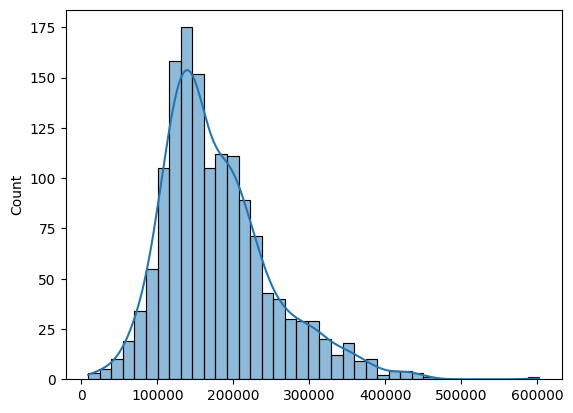

In [86]:
import seaborn as sns

sns.histplot(preds, kde=True)

In [87]:
res = xnew[["Id"]]
res.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


In [88]:
res["SalePrice"] = preds.round(2)
res

,Id,SalePrice
0,1461,108550.42
1,1462,156311.54
2,1463,167380.77
3,1464,174224.97
4,1465,191090.75
...,...,...
1454,2915,70814.87
1455,2916,66133.69
1456,2917,158470.83
1457,2918,112565.32


In [89]:
res.to_csv("results.csv", index=False)

# Save the model object, preprocessor and selectore


In [91]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [92]:

joblib.dump(sel, "sel.joblib")

['sel.joblib']

In [93]:
joblib.dump(best_final_model, "ridge_price_model.joblib")

['ridge_price_model.joblib']

# Load the files


In [94]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [95]:
sel = joblib.load("sel.joblib")
sel

,estimator,LinearRegression()
,n_features_to_select,'auto'
,tol,None
,direction,'forward'
,scoring,None
,cv,5
,n_jobs,None
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [96]:
m = joblib.load("ridge_price_model.joblib")
m

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [97]:
m.score(xtrain_pre_sel, ytrain)

0.8520775435989794

In [98]:
m.score(xtest_pre_sel, ytest)

0.8051340907228183